### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Exploration

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Data Cleaning

Checking for null values - (no null values)

In [4]:
df.isnull().sum().sum()

0

Checking for duplicate values

In [5]:
duplicates = df.duplicated().sum()
print("Number of duplicate values: ", duplicates)

Number of duplicate values:  3854


Dropping duplicated values

In [6]:
df.drop_duplicates(inplace = True) 
df.shape

(96146, 9)

### Data Visualization 

visualizing numerical features using histogram distributions

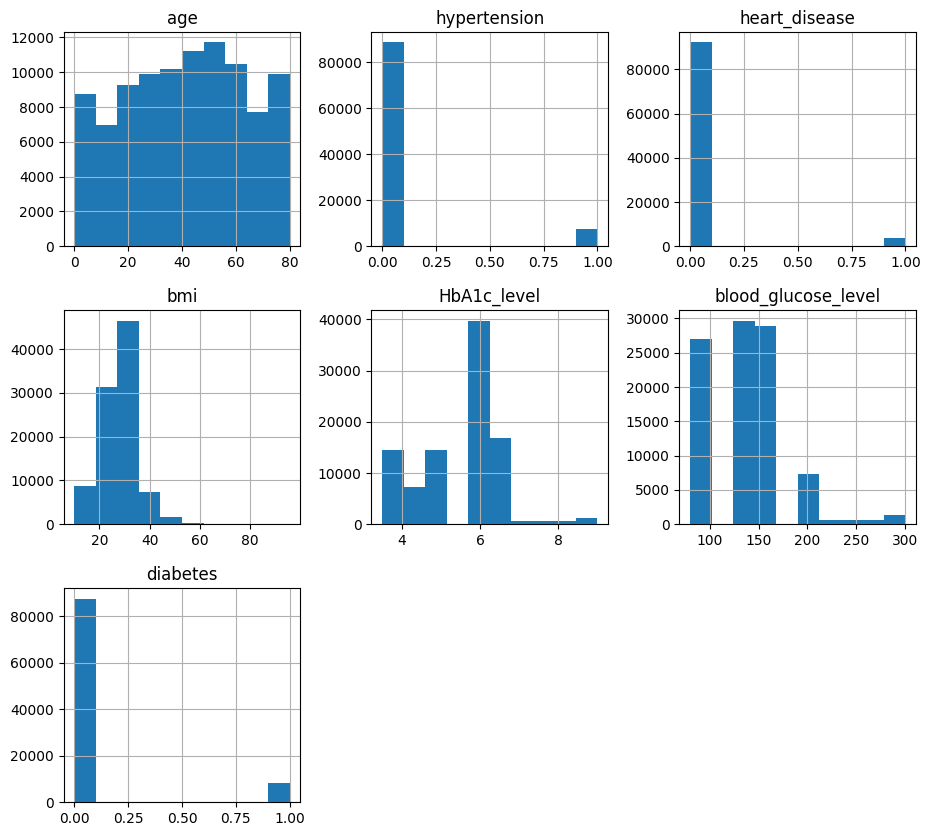

In [7]:
df.hist(figsize=(11, 10))
plt.show()

visualizing categorical variables using count plot

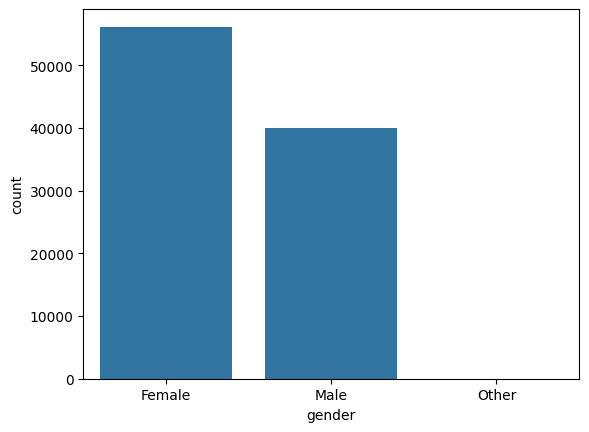

In [8]:
#gender 

import seaborn as sns
sns.countplot(x='gender', data=df)
plt.show()

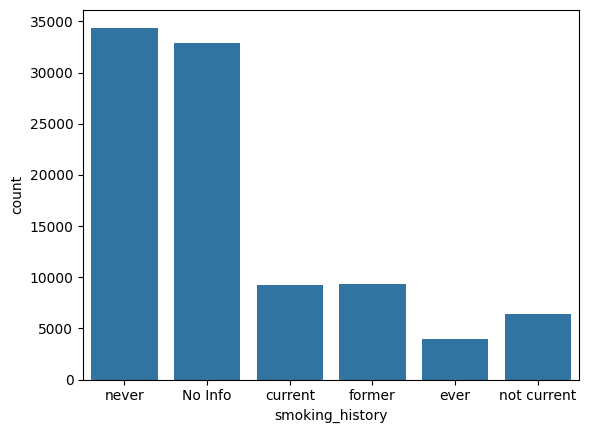

In [10]:
#smoking_history

sns.countplot(x='smoking_history', data=df)
plt.show()

### Data Pre-processing

Conversion of categorical variables into numerical variables

In [9]:
df = pd.get_dummies(df, drop_first = True)  # One-hot encoding

Scaling the Numeric features

In [10]:
from sklearn.preprocessing import StandardScaler

features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

standard_scaler = StandardScaler()
df[features] = standard_scaler.fit_transform(df[features])

Splitting the data set into training and testing data

In [11]:
from sklearn.model_selection import train_test_split

# x has all the features except the target variable (diabetes)
# y has the target variable (diabetes)

x = df.drop('diabetes', axis = 1)
y = df['diabetes']

# Split the data into training (80%) and testing (20%) sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

[x_train.shape, x_test.shape], [y_train.shape, y_test.shape]

([(76916, 13), (19230, 13)], [(76916,), (19230,)])

### Feature Engineering

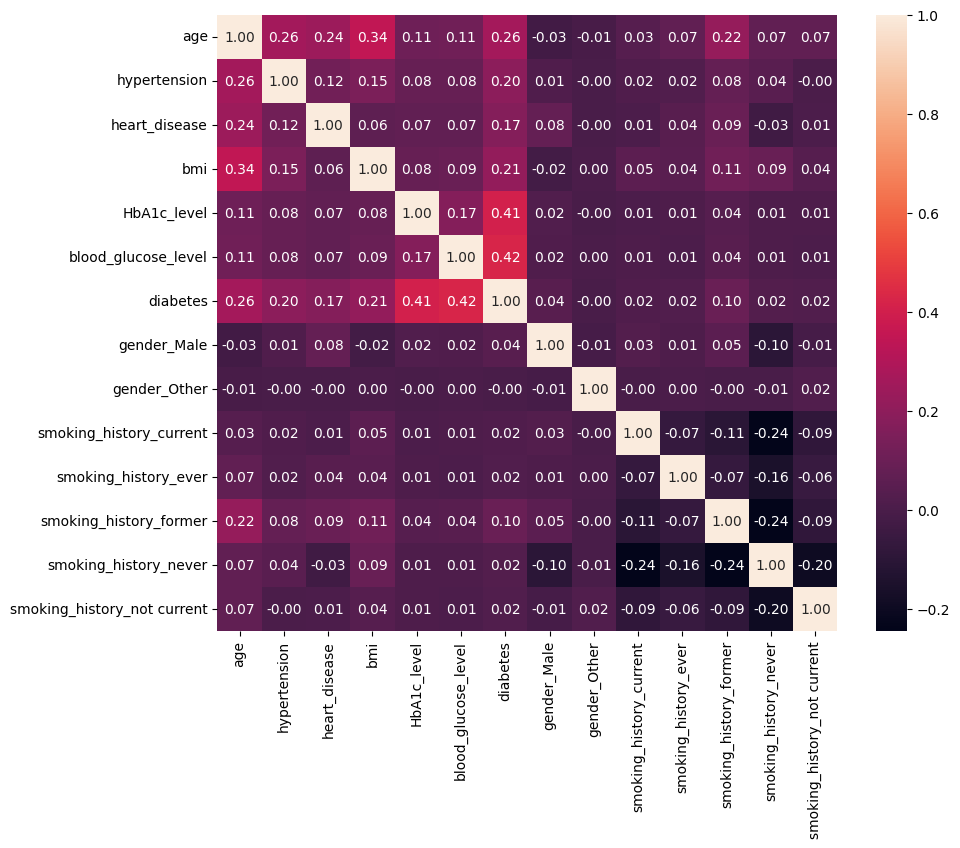

In [12]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


### Choosing the best model - Radom Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(random_state=42)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

### EVALUATION MATRIX

In [17]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))



Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.94      0.69      0.79      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



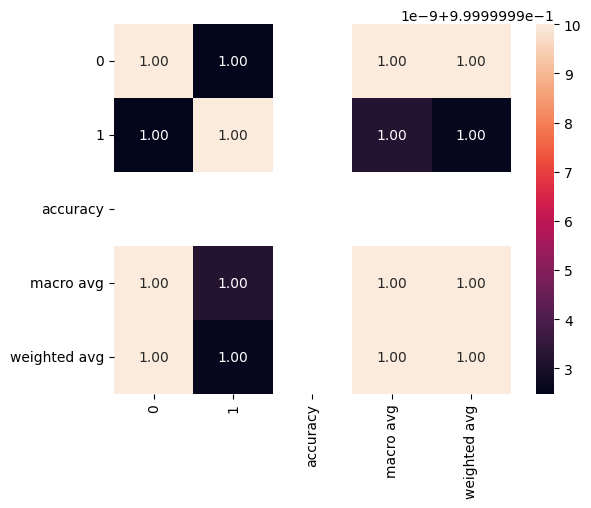

In [19]:
dataFrame = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
corr_matrix = dataFrame.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          96146 non-null  float64
 1   hypertension                 96146 non-null  int64  
 2   heart_disease                96146 non-null  int64  
 3   bmi                          96146 non-null  float64
 4   HbA1c_level                  96146 non-null  float64
 5   blood_glucose_level          96146 non-null  float64
 6   diabetes                     96146 non-null  int64  
 7   gender_Male                  96146 non-null  uint8  
 8   gender_Other                 96146 non-null  uint8  
 9   smoking_history_current      96146 non-null  uint8  
 10  smoking_history_ever         96146 non-null  uint8  
 11  smoking_history_former       96146 non-null  uint8  
 12  smoking_history_never        96146 non-null  uint8  
 13  smoking_history_